In [1]:
import numpy as np
n = 200
X = 4 * np.random.rand(n, 1)
y = - 6 + 11 * X - 6 * X**2 + 1 * X**3 + 0.4 * np.random.randn(n, 1)

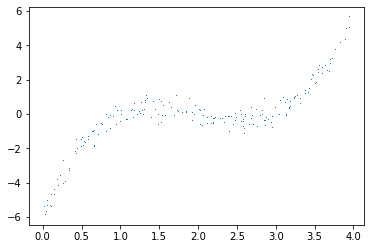

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, ',')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
pred = lr.predict(X_train)

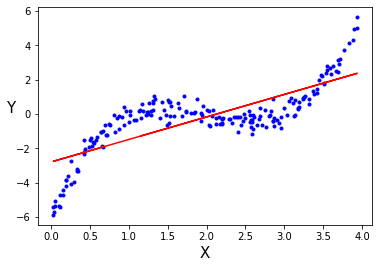

In [8]:
plt.plot(X,y,"b.")
plt.ylabel("Y", fontsize=15,rotation=0)
plt.xlabel("X", fontsize=15)
plt.plot(X_train, pred, 'r')
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([-5.73195424]),
 array([[ 4.62512779e+00,  3.33386449e+01, -9.03102465e+01,
          7.20999636e+01,  2.67346256e+01, -4.94575832e+01,
         -2.24483004e+01,  3.34728353e+01,  1.98346317e+01,
         -2.54559136e+01, -1.06125660e+01,  2.26125243e+01,
         -8.74041331e+00, -2.30201345e+00,  3.47667249e+00,
         -1.53797099e+00,  3.78144545e-01, -5.53956016e-02,
          4.54955064e-03, -1.62194003e-04]]))

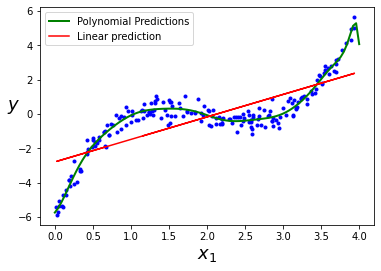

In [14]:
X_new=np.linspace(0, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g", linewidth=2, label="Polynomial Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_train, pred, 'r', label="Linear prediction")
plt.legend()
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
degrees = [1, 3, 20]

In [17]:
plt.figure(figsize=(14, 5))

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

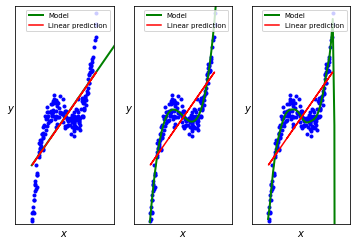

In [18]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # PolynomialFeatures 클래스를 이용해 피처를 다항식 피처로 변환
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    X_poly = poly_features.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    lin_reg.intercept_ , lin_reg.coef_

    X_new=np.linspace(0, 10, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_new, "g", linewidth=2, label="Model")
    plt.xlabel("$x$", fontsize=10)
    plt.ylabel("$y$", rotation=0, fontsize=10)
    plt.plot(X_train, pred, 'r', label="Linear prediction")
    plt.legend(fontsize=7)
    plt.axis([-1, 5, -6, 6])
plt.show()

In [19]:
degree = list(range(22))
MSE_tr_1 = []
MSE_te_1 = []

In [20]:
for i in range(1, len(degree)):
    poly_features = PolynomialFeatures(degree=degree[i], include_bias=False)
    X_tr_poly = poly_features.fit_transform(X_train)
    X_te_poly = poly_features.fit_transform(X_test)
    
    lin_reg = LinearRegression()
    lr.fit(X_tr_poly, y_train)
    
    y_pred_tr = lr.predict(X_tr_poly)
    y_pred_te = lr.predict(X_te_poly)

    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    MSE_te = mean_squared_error(y_test, y_pred_te)
    
    MSE_tr_1.append(MSE_tr)
    MSE_te_1.append(MSE_te)

In [21]:
import pandas as pd

In [22]:
pd.DataFrame(MSE_tr_1)

,0
0,1.382212
1,1.350409
2,0.149721
3,0.145904
4,0.145525
5,0.145472
6,0.145471
7,0.145415
8,0.145325
9,0.145260


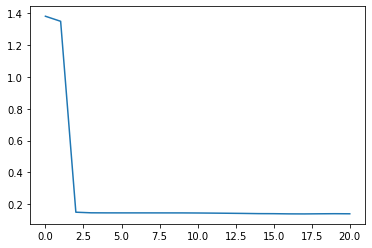

In [23]:
plt.plot(MSE_tr_1)

In [24]:
pd.DataFrame(MSE_te_1)

,0
0,1.576961
1,1.559874
2,0.109970
3,0.121105
4,0.121488
5,0.122078
6,0.122241
7,0.121162
8,0.121761
9,0.118942


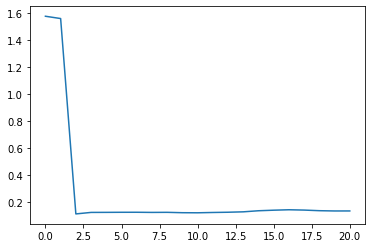

In [25]:
plt.plot(MSE_te_1)